In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from scipy.io import wavfile

wav_file_path = "../data/LIFECLEF2014_BIRDAMAZON_XC_WAV_RN9999.wav"
sample_rate, wav_data = wavfile.read( example_wav_file )

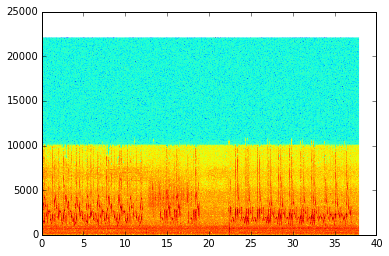

In [22]:
S, freqs, bins, im  = plt.specgram(wav_data, NFFT=1024, Fs=sample_rate, noverlap=512)



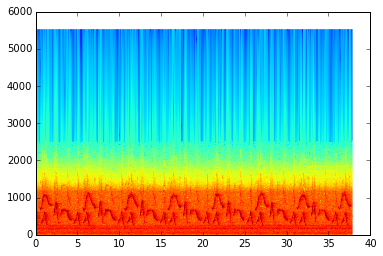

In [31]:
from scipy.signal import decimate

downsample_factor = 4
sample_rate_dec = sample_rate/4
wav_data_dec = decimate( wav_data, downsample_factor )

S_dec, freqs_dec, bins_dec, im_dec  = plt.specgram(wav_data_dec, NFFT=1024, Fs=sample_rate_dec, noverlap=512)

In [40]:
import stft

ImportError: cannot import name 'spectrogram'